## <center>Lead Scoring Case Study<center>

### Problem Statement

Company need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals & Objectives

There are quite a few goals for this case study.

- Build a <b>Logistic Regression Model</b> to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Approach in a Nutshell:

1. Importing leads data into a datframe & Inspecting the dataframe
2. Data preparation (Encoding categorical variables, Handling null values)
3. EDA (Includes univariate analysis, outlier detection, checking data imbalance)
4. Dummy variable creation
5. Test-train split
6. Feature scaling
7. Looking at correlations
8. Model building (Feature selection using RFE, improving the model further by inspecting adjusted R-Squared, VIF and p-values).
9. Bulding final model
10. Model evaluation with different metrics.

## Step 1: Reading and understanding the data

### Step 1.1 Supress warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Step 1.2 Importing required libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Display maximum number of columns
pd.set_option('display.max_columns', 120)

### Step 1.3 Reading the csv and check the head of the dataframe

In [3]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 1.4 Inspecting the dataframe

In [4]:
## Checking number of rows and columns

print(f'(Rows, Columns): { lead_df.shape }')

(Rows, Columns): (9240, 37)


In [5]:
## Checking columnwise info

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
### Checking the summary of numeric columns

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 1.5 Data quality check

In [7]:
# Replacing 'Select' with NaN (Since it means no option is selected)

lead_df = lead_df.replace('select',np.nan)
lead_df = lead_df.replace('Select',np.nan)

In [8]:
### Null value percentage

null_data_percentage = round((lead_df.isnull().sum()/len(lead_df))*100, 3).sort_values(ascending=False)
null_data_percentage

How did you hear about X Education               78.463
Lead Profile                                     74.188
Lead Quality                                     51.591
Asymmetrique Profile Score                       45.649
Asymmetrique Activity Score                      45.649
Asymmetrique Profile Index                       45.649
Asymmetrique Activity Index                      45.649
City                                             39.708
Specialization                                   36.580
Tags                                             36.288
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
TotalVisits                                       1.483
Page Views Per Visit                              1.483
Last Activity                                     1.115
Lead Source                                       0.390
Lead Origin                                     

### Step 1.6 Missing value handling

In [9]:
## Columns with more than 40% of null values.

major_missing_columns = null_data_percentage[null_data_percentage >= 40]
major_missing_columns

How did you hear about X Education    78.463
Lead Profile                          74.188
Lead Quality                          51.591
Asymmetrique Profile Score            45.649
Asymmetrique Activity Score           45.649
Asymmetrique Profile Index            45.649
Asymmetrique Activity Index           45.649
dtype: float64

In [10]:
## Removing all the columns with more than 40% of null values 

lead_df = lead_df.drop(columns=major_missing_columns.index)

In [11]:
## Checking the shape of the dataframe after dropping those columns

lead_df.shape

(9240, 30)

<strong>We have dealt with the >= 40% null values, now, we need to take care of null values which are less than 40%</strong>

In [12]:
dealing_null_values = round((lead_df.isnull().sum()/len(lead_df))*100, 3).sort_values(ascending=False)
dealing_null_values[dealing_null_values > 0]

City                                             39.708
Specialization                                   36.580
Tags                                             36.288
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
TotalVisits                                       1.483
Page Views Per Visit                              1.483
Last Activity                                     1.115
Lead Source                                       0.390
dtype: float64

### Step 1.6 Imputing missing values 

### Step 1.6.1) Dealing with `Tags` column


In [13]:
## Checking type

lead_df.Tags.dtype

dtype('O')

In [14]:
## Checking value counts

lead_df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [15]:
## Getting mode value

mode_value = lead_df.Tags.mode()[0]
mode_value

'Will revert after reading the email'

In [16]:
## Imputing with the mode value. (As the column is of type object)

lead_df['Tags'] = lead_df['Tags'].fillna(mode_value)

In [17]:
## Checking null values 

lead_df.Tags.isnull().sum()

0

### Step 1.6.2) Dealing with `What matters most to you in choosing a course` column

In [18]:
## Checking type

lead_df['What matters most to you in choosing a course'].dtype

dtype('O')

In [19]:
## Checking value counts

lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
## Getting mode value

mode_value = lead_df['What matters most to you in choosing a course'].mode()[0]
mode_value

'Better Career Prospects'

In [21]:
## Imputing with the mode value.

lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna(mode_value)

In [22]:
## Checking null values 

lead_df['What matters most to you in choosing a course'].isnull().sum()

0

### Step 1.6.3) Dealing with `City` column

In [23]:
## Checking type

lead_df['City'].dtype

dtype('O')

In [24]:
## Checking value counts

lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [25]:
## Getting mode value

mode_value = lead_df['City'].mode()[0]
mode_value

'Mumbai'

In [26]:
## Imputing with the mode value.

lead_df['City'] = lead_df['City'].fillna(mode_value)

In [27]:
## Checking null values 

lead_df['City'].isnull().sum()

0

### Step 1.6.4) Dealing with `Specialization` column

In [28]:
## Checking type

lead_df['Specialization'].dtype

dtype('O')

In [29]:
## Checking value counts

lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [30]:
## Getting mode value

mode_value = lead_df['Specialization'].mode()[0]
mode_value

'Finance Management'

In [31]:
## Imputing with the mode value.

lead_df['Specialization'] = lead_df['Specialization'].fillna(mode_value)

In [32]:
## Checking null values 

lead_df['Specialization'].isnull().sum()

0

### Step 1.6.5) Dealing with `What is your current occupation` column

In [33]:
## Checking type

lead_df['What is your current occupation'].dtype

dtype('O')

In [34]:
## Checking value counts

lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
## Getting mode value

mode_value = lead_df['What is your current occupation'].mode()[0]
mode_value

'Unemployed'

In [36]:
## Imputing with the mode value.

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna(mode_value)

In [37]:
## Checking null values 

lead_df['What is your current occupation'].isnull().sum()

0

### Step 1.6.6) Dealing with `Country` column

In [38]:
## Checking type

lead_df['Country'].dtype

dtype('O')

In [39]:
## Checking value counts

lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Belgium                    2
Netherlands                2
Asia/Pacific Region        2
China                      2
Ghana                      2
Philippines                2
Bangladesh                 2
Italy                      2
Uganda                     2
Denmark                    1
Sri Lanka                  1
Russia                     1
Vietnam                    1
Tanzania                   1
Indonesia                  1
Liberia       

In [40]:
## Getting mode value

mode_value = lead_df['Country'].mode()[0]
mode_value

'India'

In [41]:
## Imputing with the mode value.

lead_df['Country'] = lead_df['Country'].fillna(mode_value)

In [42]:
## Checking null values 

lead_df['Country'].isnull().sum()

0

<strong>We dealth with missing values for the columns having missing value percentage > 2</strong>

In [43]:
## Checking missing values 

round((lead_df.isnull().sum()/len(lead_df))*100, 3).sort_values(ascending=False)

TotalVisits                                      1.483
Page Views Per Visit                             1.483
Last Activity                                    1.115
Lead Source                                      0.390
Last Notable Activity                            0.000
A free copy of Mastering The Interview           0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
Total Time Spent on Website                      0.000
Country                                          0.000
Specialization                                   0.000
What is your current occupation                  0.000
What matters most to you in choosing a course    0.000
Search                                           0.000
Magazine                                         0.000
Newspaper 

In [44]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped

lead_df.dropna(inplace=True)

In [45]:
## Check for duplicates

lead_df.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [46]:
## Prospect ID & Lead Number are unique ( We can drop those columns)

lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

## Step 2: Encoding & Exploratory Data Analysis

In [47]:
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:
    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [48]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

### Step 2.1 Checking imbalance in the target variable

In [49]:
lead_df['Converted'].value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

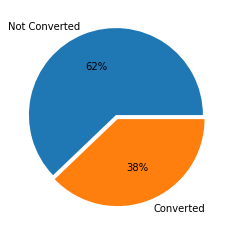

In [50]:
plt.pie(lead_df['Converted'].value_counts(normalize=True)*100,
       labels=['Not Converted', 'Converted'],
       explode=(0,0.05),
       autopct='%1.f%%')
plt.show()

### Step 2.2 Univariate Analysis

### Step 2.2.1 Categorical Variables

In [51]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

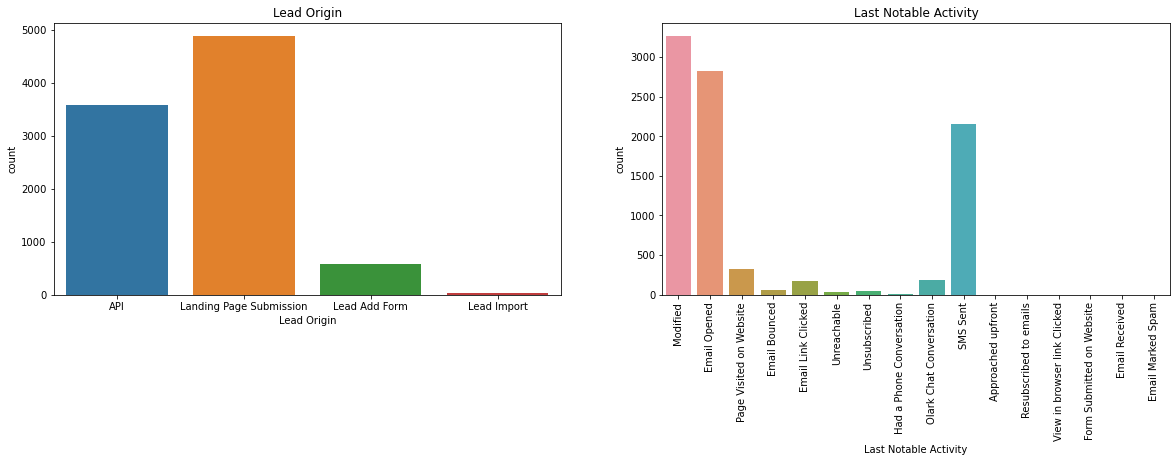

In [52]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data=lead_df, x='Lead Origin')
plt.title('Lead Origin')


plt.subplot(1,2,2)
sns.countplot(data=lead_df, x='Last Notable Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

`Inferences`: From the above plots, we can say that 
   - The lead origin `Landing Page Submissions` are more compared to API and lead add form and lead imports are very less.

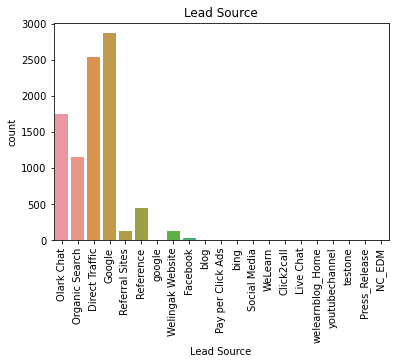

In [53]:
sns.countplot(data=lead_df, x='Lead Source').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

`Inference`:
  - Google & Direct traffic are the major leading sources 

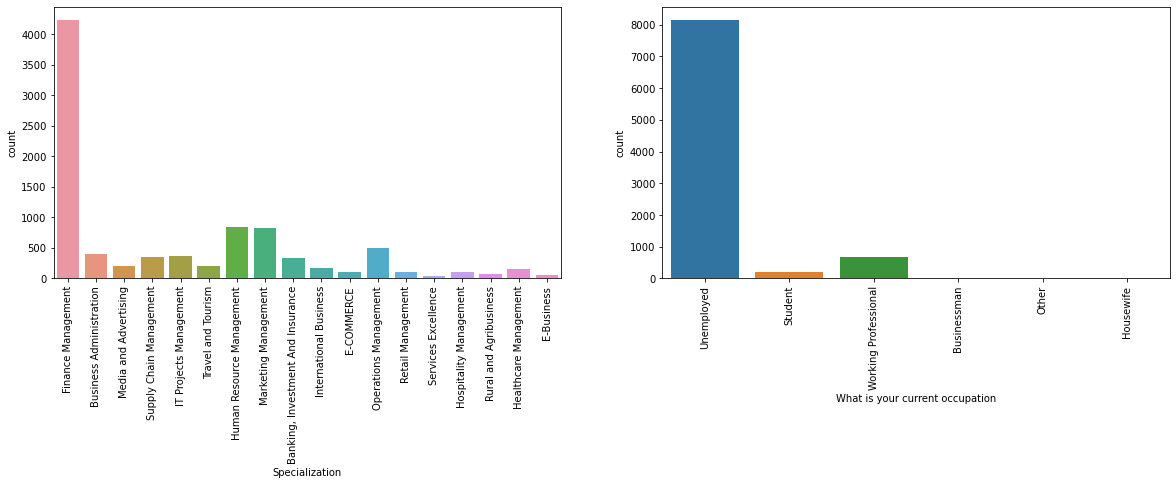

In [54]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data=lead_df, x='Specialization').tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=lead_df, x='What is your current occupation').tick_params(axis='x', rotation = 90)

plt.show()



`Inference`:
  - Most of the customers are from finance management specialization before.
  - Majority of the customers are unemployed and there are no customers from businessman/Others/Housewide, very less are students and some of them are working professionals

### Step 2.2.2 Numerical Variables

In [55]:
numeric_columns = lead_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

-5.0 11.0
TotalVisits greater than 11.0 is considered to be an outlier


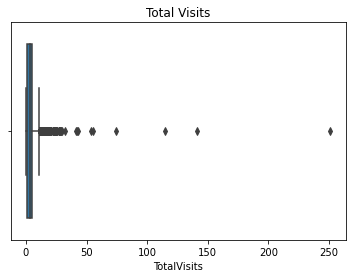

In [56]:
## Column TotalVisits

sns.boxplot(lead_df['TotalVisits'])
plt.title('Total Visits')

Q1 = lead_df['TotalVisits'].quantile(0.25)
Q3 = lead_df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

print(lowerwhisker, upperwhisker)
print("TotalVisits greater than {} is considered to be an outlier".format(upperwhisker))

In [57]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= q1] = q1

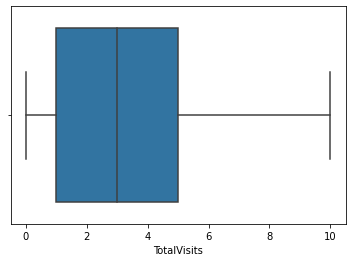

In [58]:
## After capping

sns.boxplot(lead_df['TotalVisits'])
plt.show()

Total Time Spent on Website greater than 2290.375 is considered to be an outlier


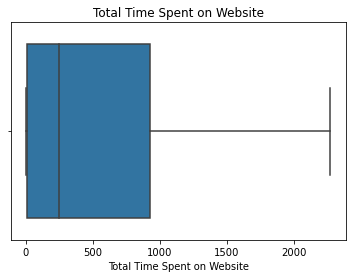

In [59]:
## Column Total Time Spent on Website 

sns.boxplot(lead_df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

Q1 = lead_df['Total Time Spent on Website'].quantile(0.25)
Q3 = lead_df['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

print("Total Time Spent on Website greater than {} is considered to be an outlier".format(upperwhisker))

Page Views Per Visit greater than 6.5 is considered to be an outlier


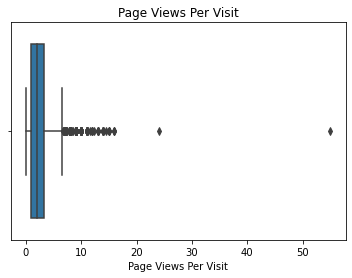

In [60]:
### Column Page Views Per Visit

sns.boxplot(lead_df['Page Views Per Visit'])
plt.title('Page Views Per Visit')

Q1 = lead_df['Page Views Per Visit'].quantile(0.25)
Q3 = lead_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

print("Page Views Per Visit greater than {} is considered to be an outlier".format(upperwhisker))

In [61]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = lead_df["Page Views Per Visit"].quantile(0.95)
lead_df["Page Views Per Visit"][lead_df["Page Views Per Visit"] >= q1] = q1

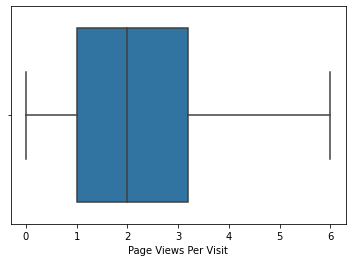

In [62]:
## After capping

sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

## Step 2.3 Bi-Variate Analysis

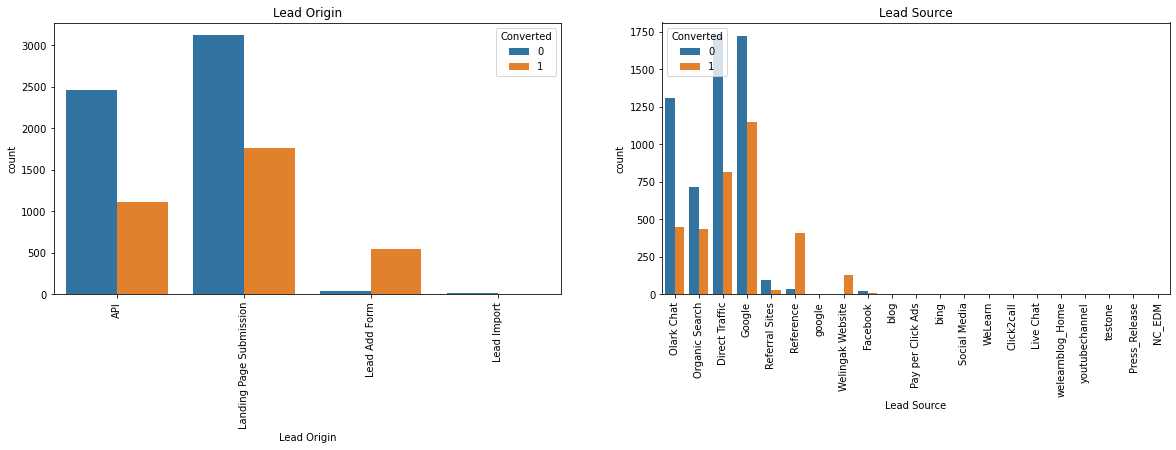

In [63]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

`Inference`:
   - API and Landing Page Submission has less conversion rate.
   - The count of leads from the Lead add form is pretty low but the conversion rate is very high
   - Lead Import has very less count as well as conversion rate and hence can be ignored
   - The count of leads from the Google and Direct Traffic is maximum
   - The conversion rate of the leads from Reference and Welingak Website is maximum when compared to not converted leads.

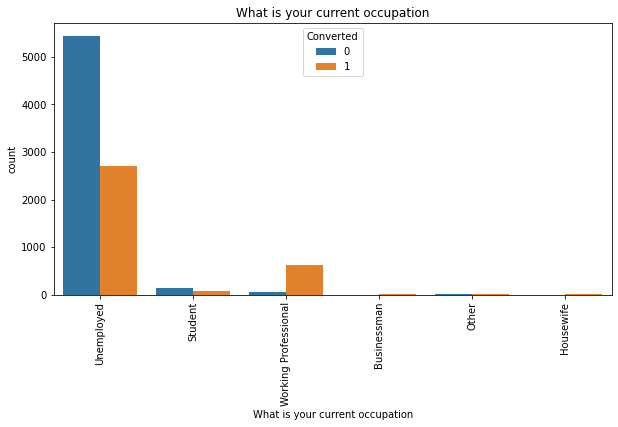

In [64]:
plt.figure(figsize = (10,5))

sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

`Inference`:
   - Majority of the customers are unemployed (both leads and non-leads) and there are very few customers from businessman/Others/Housewide, very less are students and some of them are working professionals
   - Working professionals has highest conversion rate 

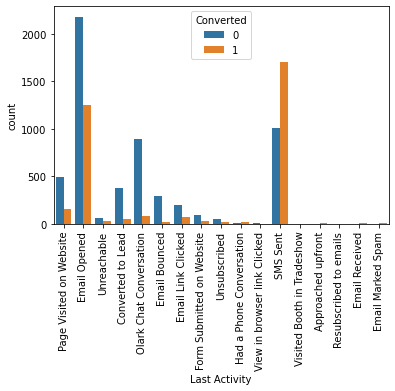

In [65]:
sns.countplot(x="Last Activity", hue="Converted", data= lead_df)
plt.xticks(rotation=90)
plt.show()

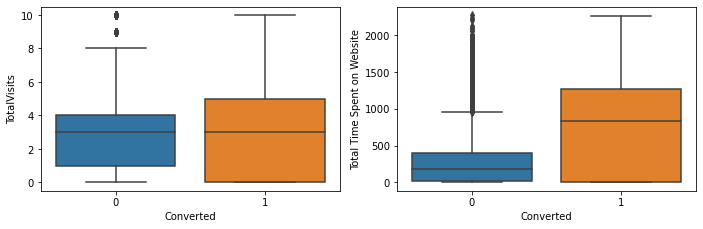

In [66]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead_df)
    plt.tight_layout()

`Inference`:
 - The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information
 - Users spending more time on the website are more likely to get converted

`Overall Summary`:
 - We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis
  - Websites can be made more appealing so as to increase the time of the Users on websites
 - We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent
 
 - To improve the overall lead conversion rate, 
     - We need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'
     - We need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'
     - We need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

In [67]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
## Dropping unnecessary columns

un_necessary_columns = ['Do Not Call', 
                        'What matters most to you in choosing a course', 
                        'Search', 
                        'Magazine', 
                        'Newspaper Article',
                        'X Education Forums',
                        'Newspaper',
                        'Digital Advertisement',
                        'Through Recommendations',
                        'Get updates on DM Content',
                        'I agree to pay the amount through cheque',
                        'A free copy of Mastering The Interview',
                        'Country'
                       ]
lead_df.drop(columns=un_necessary_columns, inplace=True, axis=1)

In [69]:
lead_df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content'], inplace=True, axis = 1)

In [70]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,Modified


## Step 2.4 Correlation

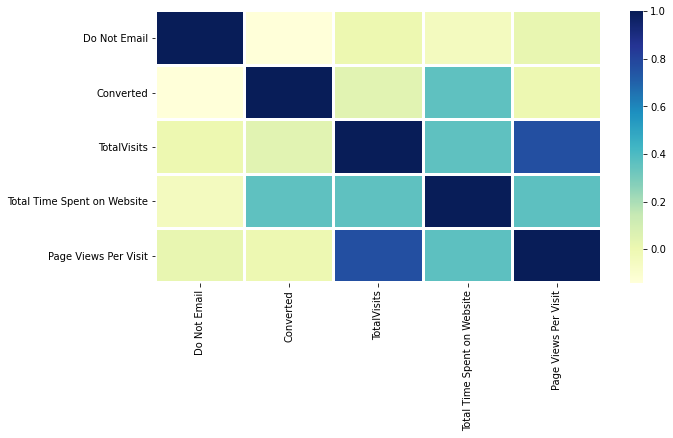

In [71]:
# To check the correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr(), cmap="YlGnBu", linewidths=2)
plt.show()

## Step 3: Dummy variable creation

In [72]:
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [73]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'], axis=1)
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


In [74]:
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Step 4: Splitting the data into training and testing sets

### Step 4.1 Test and train split 

In [75]:
X = lead_df.drop('Converted', axis=1)
y = lead_df['Converted']

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
X_train.shape

(6351, 110)

In [78]:
X_test.shape

(2723, 110)

In [79]:

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,2.0,397,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,2.0,190,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

### Step 4.2 Rescaling the features

In [80]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

In [81]:
X_train[['TotalVisits',
         'Total Time Spent on Website',
         'Page Views Per Visit']
       ] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [82]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


### Step 4.3 Looking at the correlations

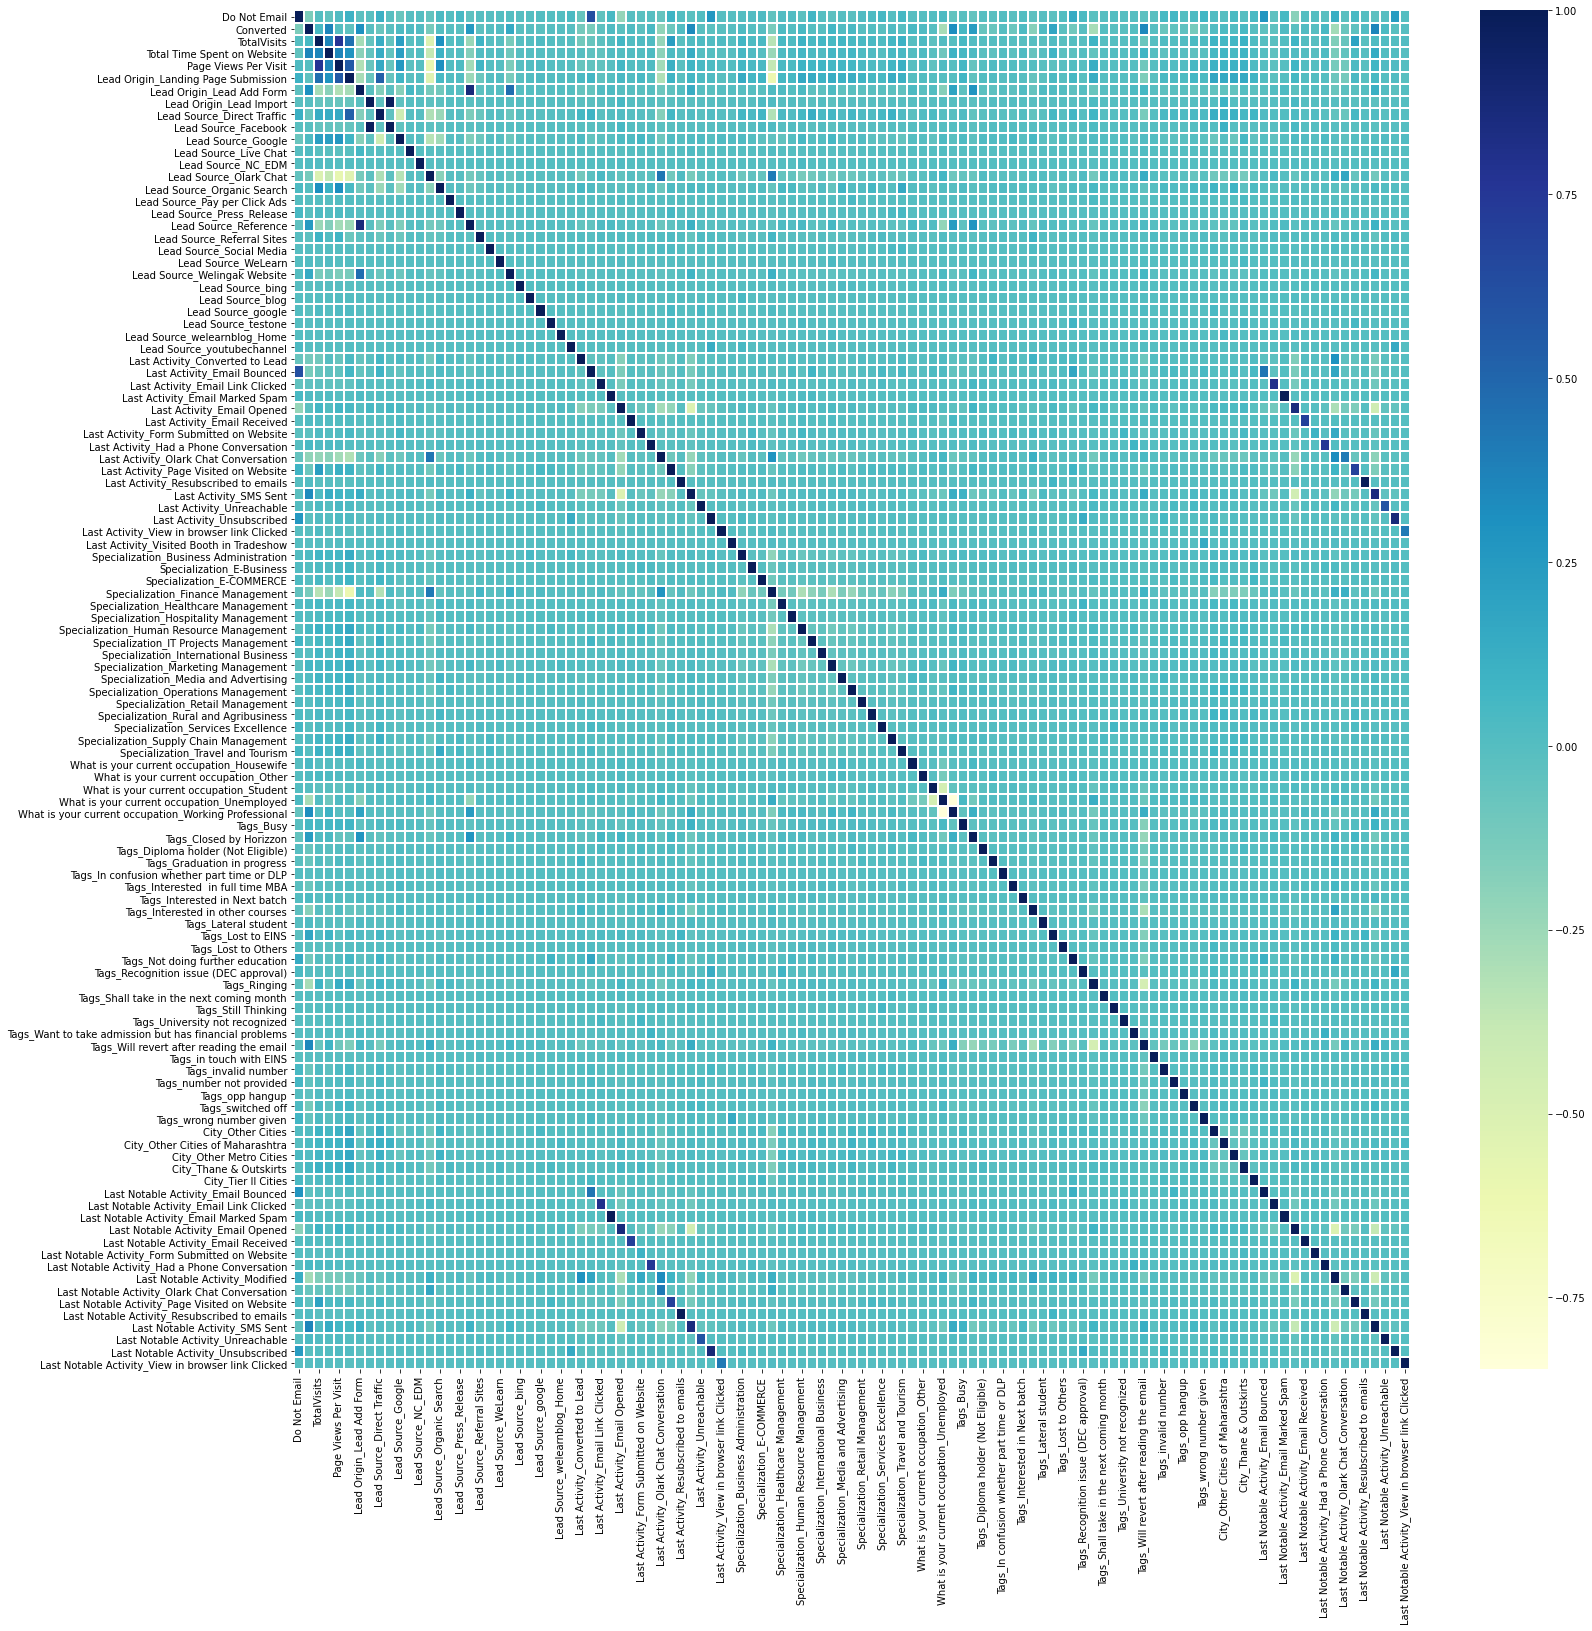

In [83]:
plt.figure(figsize=(25,25))
sns.heatmap(lead_df.corr(), cmap='YlGnBu', linewidths=1)
plt.show()

In [84]:
corr = lead_df.corr()

# Unstacking the correlation matrix to find out top correlations
corr_unstacked = corr.unstack().sort_values(kind="quicksort")
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Last Activity_Resubscribed to emails    Last Notable Activity_Resubscribed to emails      1.000000
Last Activity_Email Marked Spam         Last Notable Activity_Email Marked Spam           1.000000
Lead Origin_Lead Import                 Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed              Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form               Lead Source_Reference                             0.866191
Last Activity_Email Opened              Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked          0.800686
TotalVisits                             Page Views Per Visit                              0.766567
Last Activity_Had a Phone Conversation  Last Notable Activity_Had a Phone Conversation    0.747877
dtype: flo

In [85]:
# Dropping highly correlated features

unwanted_columns = ['Last Notable Activity_Resubscribed to emails',
                    'Last Notable Activity_Email Marked Spam',
                    'Lead Source_Facebook',
                    'Last Notable Activity_Unsubscribed',
                    'Lead Source_Reference',
                    'Last Notable Activity_Email Opened',
                    'Last Notable Activity_SMS Sent',
                    'Last Notable Activity_Email Link Clicked',
                    'Page Views Per Visit',
                    'Last Notable Activity_Had a Phone Conversation'
                   ]

X_test = X_test.drop(columns=unwanted_columns, axis=1)
X_train = X_train.drop(columns=unwanted_columns, axis=1)

## Step 5: Building a model

### Step 5.1 RFE  (Recursive feature elimation)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 15)  
rfe = rfe.fit(X_train, y_train)

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 71),
 ('Total Time Spent on Website', False, 7),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 76),
 ('Lead Source_NC_EDM', False, 49),
 ('Lead Source_Olark Chat', False, 44),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Pay per Click Ads', False, 84),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 36),
 ('Lead Source_WeLearn', False, 86),
 ('Lead Source_Welingak Website', False, 4),
 ('Lead Source_bing', False, 81),
 ('Lead Source_blog', False, 24),
 ('Lead Source_google', False, 19),
 ('Lead Source_testone', False, 83),
 ('Lead Source_welearnblog_Home', False, 33),
 ('Lead Source_youtubechannel', False, 32),
 ('Last Activity_Converted to Lead', 

In [88]:
## Storing the selected 15 variables

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Step 5.2 Building model using stats model, for the detailed statistics

In [89]:
import statsmodels.api as sm

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1994.1
Date:                Sat, 04 Sep 2021   Deviance:                       3988.1
Time:                        16:45:07   Pearson chi2:                 1.05e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3863      0.216     -6.404      0.000      -1.811      -0.962
Do Not Email                                     -1.6311      0.204     -8.002      0.000      -2.031      -1.232
Lead Origin_Lead Add Form                         2.4844      0.260      9.547      0.000       1.974       2.994
Last Activity_Had a Phone Conversation            3.0505      1.045      2.919      0.004       1.002       5.099
Last Activity_SMS Sent                            1.9607      0.091     21.567      0.000       1.783       2.139
Last Activity_Unsubscribed                        2.1944      0.554      3.959      0.000       1.108       3.281
What is your current occupation_Unemployed       -2.5557      0.181    -14.142      0.000      -2.910      -2.201
Tags_Busy                                         3.2391      0.288     11.251      0.000       2.675       3.803
Tags_Closed by Horizzon                           9.1566      0.746     12.279      0.000       7.695      10.618
Tags_Interested in Next batch                    26.9416   5.95e+04      0.000      1.000   -1.17e+05    1.17e+05
Tags_Lost to EINS                                 8.9897      0.755     11.912      0.000       7.511      10.469
Tags_Ringing                                     -0.9798      0.309     -3.175      0.002      -1.585      -0.375
Tags_Will revert after reading the email          3.7565      0.196     19.139      0.000       3.372       4.141
Tags_invalid number                             -21.2609   1.48e+04     -0.001      0.999    -2.9e+04    2.89e+04
Last Notable Activity_Modified                   -1.7201      0.093    -18.590      0.000      -1.901      -1.539
Last Notable Activity_Olark Chat Conversation    -1.6979      0.317     -5.353      0.000      -2.320      -1.076
=================================================================================================================
"""

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [92]:
## Checking VIF's

def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = 'VIF', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                         Features   VIF
5      What is your current occupation_Unemployed  4.55
11       Tags_Will revert after reading the email  3.19
13                 Last Notable Activity_Modified  1.69
3                          Last Activity_SMS Sent  1.60
10                                   Tags_Ringing  1.60
1                       Lead Origin_Lead Add Form  1.22
7                         Tags_Closed by Horizzon  1.21
0                                    Do Not Email  1.19
6                                       Tags_Busy  1.11
4                      Last Activity_Unsubscribed  1.08
9                               Tags_Lost to EINS  1.07
12                            Tags_invalid number  1.05
14  Last Notable Activity_Olark Chat Conversation  1.05
2          Last Activity_Had a Phone Conversation  1.01
8                   Tags_Interested in Next batch  1.01


All variables have a good value of VIF. But we observed earlier that the columns <strong> "Tags_Interested in Next batch", "Tags_invalid number"</strong> has high p-value and hence we will drop these columns one by one and see the effect.

## Model 2:

In [93]:
col = col.drop("Tags_Interested in Next batch")

In [94]:
len(col)

14

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2002.2
Date:                Sat, 04 Sep 2021   Deviance:                       4004.4
Time:                        16:45:08   Pearson chi2:                 1.02e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3152      0.211     -6.243      0.000      -1.728      -0.902
Do Not Email                                     -1.5969      0.202     -7.895      0.000      -1.993      -1.200
Lead Origin_Lead Add Form                         2.4962      0.259      9.625      0.000       1.988       3.005
Last Activity_Had a Phone Conversation            3.0554      1.046      2.922      0.003       1.006       5.105
Last Activity_SMS Sent                            1.9729      0.091     21.725      0.000       1.795       2.151
Last Activity_Unsubscribed                        2.1624      0.553      3.914      0.000       1.079       3.245
What is your current occupation_Unemployed       -2.5230      0.178    -14.159      0.000      -2.872      -2.174
Tags_Busy                                         3.1272      0.282     11.081      0.000       2.574       3.680
Tags_Closed by Horizzon                           9.0571      0.744     12.181      0.000       7.600      10.514
Tags_Lost to EINS                                 8.8860      0.752     11.814      0.000       7.412      10.360
Tags_Ringing                                     -1.0950      0.303     -3.611      0.000      -1.689      -0.501
Tags_Will revert after reading the email          3.6508      0.188     19.435      0.000       3.283       4.019
Tags_invalid number                             -21.3745   1.48e+04     -0.001      0.999   -2.89e+04    2.89e+04
Last Notable Activity_Modified                   -1.7260      0.092    -18.668      0.000      -1.907      -1.545
Last Notable Activity_Olark Chat Conversation    -1.6980      0.317     -5.357      0.000      -2.319      -1.077
=================================================================================================================
"""

### p-values for Tags_invalid number is still high 

In [96]:
calculate_vif(X_train[col])

                                         Features   VIF
5      What is your current occupation_Unemployed  4.54
10       Tags_Will revert after reading the email  3.18
12                 Last Notable Activity_Modified  1.69
3                          Last Activity_SMS Sent  1.60
9                                    Tags_Ringing  1.60
1                       Lead Origin_Lead Add Form  1.22
7                         Tags_Closed by Horizzon  1.21
0                                    Do Not Email  1.19
6                                       Tags_Busy  1.11
4                      Last Activity_Unsubscribed  1.08
8                               Tags_Lost to EINS  1.07
11                            Tags_invalid number  1.05
13  Last Notable Activity_Olark Chat Conversation  1.05
2          Last Activity_Had a Phone Conversation  1.01


All variables have a good value of VIF. But we observed earlier that the columns <strong> "Tags_invalid number" </strong> has high p-value and hence we will drop this column and see the effect.

## Model 3:

In [97]:
col = col.drop("Tags_invalid number")

In [98]:
len(col)

13

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2005.1
Date:                Sat, 04 Sep 2021   Deviance:                       4010.2
Time:                        16:45:08   Pearson chi2:                 1.05e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3775      0.212     -6.497      0.000      -1.793      -0.962
Do Not Email                                     -1.5974      0.202     -7.896      0.000      -1.994      -1.201
Lead Origin_Lead Add Form                         2.5047      0.260      9.639      0.000       1.995       3.014
Last Activity_Had a Phone Conversation            3.0533      1.045      2.921      0.003       1.005       5.102
Last Activity_SMS Sent                            1.9645      0.091     21.677      0.000       1.787       2.142
Last Activity_Unsubscribed                        2.1384      0.547      3.908      0.000       1.066       3.211
What is your current occupation_Unemployed       -2.5499      0.179    -14.207      0.000      -2.902      -2.198
Tags_Busy                                         3.2214      0.281     11.468      0.000       2.671       3.772
Tags_Closed by Horizzon                           9.1427      0.743     12.298      0.000       7.686      10.600
Tags_Lost to EINS                                 8.9723      0.752     11.932      0.000       7.498      10.446
Tags_Ringing                                     -1.0012      0.302     -3.315      0.001      -1.593      -0.409
Tags_Will revert after reading the email          3.7402      0.187     20.035      0.000       3.374       4.106
Last Notable Activity_Modified                   -1.7224      0.092    -18.623      0.000      -1.904      -1.541
Last Notable Activity_Olark Chat Conversation    -1.6972      0.317     -5.352      0.000      -2.319      -1.076
=================================================================================================================
"""

In [100]:
calculate_vif(X_train[col])

                                         Features   VIF
5      What is your current occupation_Unemployed  4.42
10       Tags_Will revert after reading the email  3.10
11                 Last Notable Activity_Modified  1.69
3                          Last Activity_SMS Sent  1.59
9                                    Tags_Ringing  1.57
1                       Lead Origin_Lead Add Form  1.22
7                         Tags_Closed by Horizzon  1.21
0                                    Do Not Email  1.18
6                                       Tags_Busy  1.11
4                      Last Activity_Unsubscribed  1.08
8                               Tags_Lost to EINS  1.07
12  Last Notable Activity_Olark Chat Conversation  1.05
2          Last Activity_Had a Phone Conversation  1.01


### From the above model, we dont see any variable whose p-value is > 0.05 (i.e we dont see any insignificant variables) and we even dont see any variable whose VIF > 10 (i.e. there is no multicollinearity).

## Step 6: Creating predictions

In [101]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.453316
1012    0.682497
9226    0.009133
4750    0.855348
7987    0.994968
1281    0.855348
2880    0.453316
4971    0.778747
7536    0.453316
1248    0.009133
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.453316  , 0.68249695, 0.00913347, 0.855348  , 0.99496786,
       0.855348  , 0.453316  , 0.77874719, 0.453316  , 0.00913347])

In [103]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.453316,3009
1,0,0.682497,1012
2,0,0.009133,9226
3,1,0.855348,4750
4,1,0.994968,7987


In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [105]:
# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.453316,3009,0
1,0,0.682497,1012,1
2,0,0.009133,9226,0
3,1,0.855348,4750,1
4,1,0.994968,7987,1


## Step 7: Model Evaluation

In [106]:
# model evaluation

from sklearn import metrics

In [107]:
## Creating confusion matrix

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted)
confusion_matrix

array([[3644,  261],
       [ 678, 1768]], dtype=int64)

In [108]:
# Predicted     not_churn    churn
# Actual
# not_churn        3644       261
# churn             678      1768

In [109]:
## Accuracy Score

print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8521492678318375


### Metrics beyond simply accuracy

In [110]:
TP = confusion_matrix[1,1] #true positive
TN = confusion_matrix[0,0] #true negatives
FP = confusion_matrix[0,1] #false positives
FN = confusion_matrix[1,0] #false negatives

In [111]:
# Calculating the sensitivity

TP/(TP+FN)

0.7228127555192151

In [112]:
# Calculating the specificity

TN/(TN+FP)

0.9331626120358515

In [113]:
# Calculating false postive rate

FP/ (TN+FP)

0.06683738796414852

In [114]:
# Positve predictive value

TP/ (TP+FP)

0.8713652045342534

In [115]:
# Negative predictive value

TN/ (TN+FN)

0.8431281813975011

Our model seems to have high accuracy (`85%`) and high specificity (`93%`), but sensitivity is (`72%`)

## Step 8: Plotting the ROC curve

An ROC curve
- Shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

Our goal is to achieve good sensitivity score

In [116]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

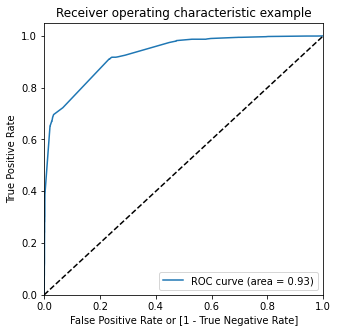

In [118]:
# Call the ROC function
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

The area under ROC curve is 0.93

## Step 9: Finding optimal value of the cut off

In [119]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.453316,3009,0,1,1,1,1,1,0,0,0,0,0
1,0,0.682497,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.009133,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.855348,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.994968,7987,1,1,1,1,1,1,1,1,1,1,1


In [120]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.702881,0.979558,0.529577
0.2,0.2,0.810896,0.917825,0.743918
0.3,0.3,0.819713,0.917416,0.758515
0.4,0.4,0.823020,0.910466,0.768246
0.5,0.5,0.852149,0.722813,0.933163
0.6,0.6,0.860494,0.686018,0.969782
0.7,0.7,0.856401,0.670482,0.972855
0.8,0.8,0.853094,0.651676,0.979257
0.9,0.9,0.762715,0.387980,0.997439


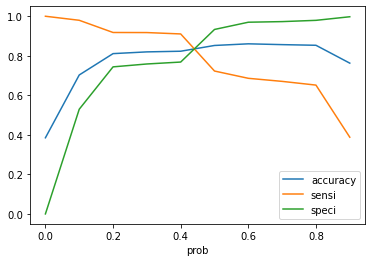

In [121]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

`INFERENCE`:
 - From the above plot 0.41 probability looks optimal.

We are taking 0.41 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [122]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.453316,3009,1,45
1,0,0.682497,1012,1,68
2,0,0.009133,9226,0,1
3,1,0.855348,4750,1,86
4,1,0.994968,7987,1,99


In [123]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted)

0.8187686978428594

In [124]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted )
confusion2

array([[2956,  949],
       [ 202, 2244]], dtype=int64)

In [125]:
TP = confusion2[1,1] #true positive
TN = confusion2[0,0] #true negatives
FP = confusion2[0,1] #false positives
FN = confusion2[1,0] #false negatives

In [126]:
# Calculating the sensitivity
TP/(TP+FN)

0.9174161896974653

In [127]:
# Calculating the specificity
TN/(TN+FP)

0.756978233034571

With the current cut off as 0.41 we have accuracy of around `82%`, sensitivity of around `91.7%` and specificity of around `75.6%`

## Step 10: Predictions on test set

In [128]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.41 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.453316,1,45
1,1,1490,0.913933,1,91
2,0,7936,0.453316,1,45
3,1,4216,0.999806,1,100
4,0,3830,0.453316,1,45


In [129]:
# Check the overall accuracy

metrics.accuracy_score(y_predicted_final.Converted, y_predicted_final.final_predicted)

0.8005875872199779

In [130]:
# Creating confusion matrix

confusion3 = metrics.confusion_matrix(y_predicted_final.Converted, y_predicted_final.final_predicted )
confusion3

array([[1302,  432],
       [ 111,  878]], dtype=int64)

In [131]:
TP = confusion2[1,1] #true positive
TN = confusion2[0,0] #true negatives
FP = confusion2[0,1] #false positives
FN = confusion2[1,0] #false negatives

In [132]:
# Calculating the sensitivity
TP/(TP+FN)

0.9174161896974653

In [133]:
# Calculating the specificity
TN/(TN+FP)

0.756978233034571

## Final Observation

Comparing tht values obtained for train and test sets

Train Set:
   - Accuracy: 81.7%
   - Sensitivity: 91.7%
   - Specificity: 75.6%
    
Test Set:
   - Accuracy: 80.0%
   - Sensitivity: 91.7%
   - Specificity: 75%

Model Coefficient values

In [134]:
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                          9.142701
Tags_Lost to EINS                                8.972286
Tags_Will revert after reading the email         3.740169
Tags_Busy                                        3.221372
Last Activity_Had a Phone Conversation           3.053336
Lead Origin_Lead Add Form                        2.504673
Last Activity_Unsubscribed                       2.138431
Last Activity_SMS Sent                           1.964459
Tags_Ringing                                    -1.001213
const                                           -1.377534
Do Not Email                                    -1.597364
Last Notable Activity_Olark Chat Conversation   -1.697187
Last Notable Activity_Modified                  -1.722429
What is your current occupation_Unemployed      -2.549916
dtype: float64

## Conclusion

Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

- Optimum cut off is chosen to be 0.41 i.e. any lead with greater than 0.41 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.41 or less probability of converting is predicted as Cold Lead (customer will not convert)

Features used in final model are:
  - Do Not Email
  - Lead Origin_Lead Add Form
  - Last Activity_Had a Phone Conversation
  - Last Activity_SMS Sent
  - Last Activity_Unsubscribed
  - What is your current occupation_Unemployed
  - Tags_Busy
  - Tags_Closed by Horizzon
  - Tags_Lost to EINS
  - Tags_Ringing
  - Tags_Will revert after reading the email
  - Last Notable Activity_Modified
  - Last Notable Activity_Olark Chat Conversation

The top three features in the final model are:
   - 'Tags_Closed by Horizzon'
   - Tags_Lost to EINS',
   - 'Tags_Will revert after reading the email'

- The final model has Sensitivity of 0.917, this means the model is able to predict 91.7% customers out of all the converted customers, (Positive conversion) correctly.